In [ ]:
!gdown 1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
# Colab 進行matplotlib繪圖時顯示繁體中文
import matplotlib as mpl
from matplotlib.font_manager import fontManager

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

[Colab](https://colab.research.google.com/drive/1nEWzLiMGCWJkQIiDxfo5K8gH9c6QDBoN#scrollTo=ybaHCJQw8mNb)

In [1]:
!pip install gdown

  Using cached gdown-4.7.1-py3-none-any.whl (15 kB)
  Using cached filelock-3.12.0-py3-none-any.whl (10 kB)


In [1]:
from sklearn.ensemble import RandomTreesEmbedding
X = [[0,0], [1,0], [0,1], [-1,0]]
random_trees = RandomTreesEmbedding(
   n_estimators=9, random_state=0, max_depth=1).fit(X)
X_sparse_embedding = random_trees.transform(X)
X_sparse_embedding.toarray()

array([[0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1.,
        1., 0.],
       [0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1.,
        1., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
        0., 1.],
       [1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
        1., 0.]])

In [2]:
!pip install pdpbox==0.2.1 -q

In [3]:
!pip install shap -q

In [4]:
import sklearn
print(sklearn.__version__)

0.22.2.post1


## PDP 實作

In [5]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import pandas as pd

# 載入加州地區房屋價格預測資料集
data = fetch_california_housing()
feature_names = np.array(data.feature_names)
X, y = data.data, data.target

# 切分資料集為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# 訓練隨機森林迴歸模型
model = RandomForestRegressor(random_state=0).fit(X_train, y_train)

In [6]:
feature_names

array(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population',
       'AveOccup', 'Latitude', 'Longitude'], dtype='<U10')

In [7]:
X_test=X_test[:5]

In [8]:
import numpy as np
np.linspace(
                0,
                1,
                num=10,
                endpoint=True,
            )

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

In [9]:
X_test[:,0].max()

5.7376

AttributeError: type object 'PartialDependenceDisplay' has no attribute 'from_estimator'

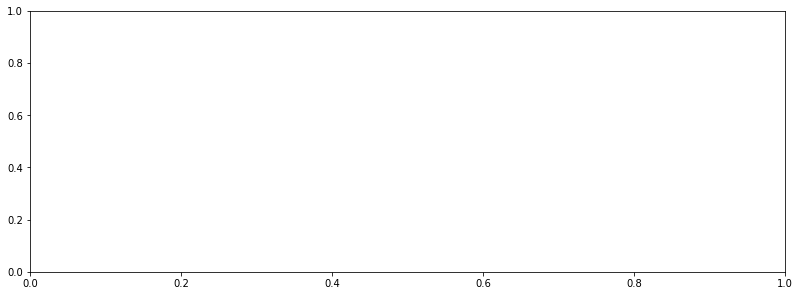

In [11]:
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay

_, ax = plt.subplots(ncols=1, figsize=(11, 4), constrained_layout=True)
PartialDependenceDisplay.from_estimator(model, X_test, ['MedInc'],
                                        feature_names=feature_names,
                                        kind='both',
                                        grid_resolution=100,
                                        percentiles=(0, 1),
                                        ax=ax)
plt.ylim((0,6))

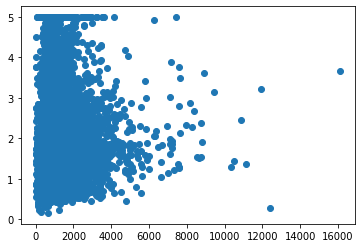

In [141]:
plt.scatter(X_test[:,4], y_test)

## shap

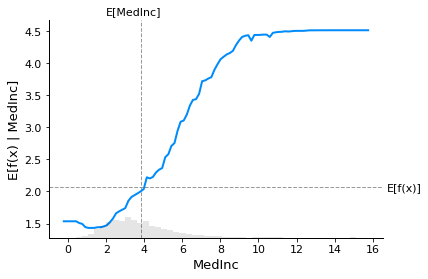

In [136]:
import shap

def shap_pdp(model, df, feature):
    shap.plots.partial_dependence( feature, model.predict, df, ice=False, model_expected_value=True, feature_expected_value=True)

# 將 ndarray 轉換成 DataFrame 格式
data = pd.DataFrame(X_test, columns=feature_names)
shap_pdp(model, data, 'MedInc')

## pdpbox

In [133]:
 from pdpbox import pdp

# 特徵名稱
# feature_names = np.array(['中位數收入','平均房齡', '平均房間數', '平均臥室數', '人口數', '每房平均居住人數', '地區緯度', '地區經度'])

def pdpbox_pdp(model, df, feature, cluster_flag=False, nb_clusters=None, lines_flag=True):
    
    # 將 XGBoost 模型賦予特徵名稱(預設是 f0, f1...)
#     model.get_booster().feature_names=feature_names
    pdp_goals = pdp.pdp_isolate(model=model, dataset=df, model_features=feature_names, feature=feature, num_grid_points=10)
    # plot it
    pdp.pdp_plot(pdp_goals, feature, center=False, plot_pts_dist=True, cluster=cluster_flag, n_cluster_centers=nb_clusters, plot_lines=lines_flag)
    pdp_goals

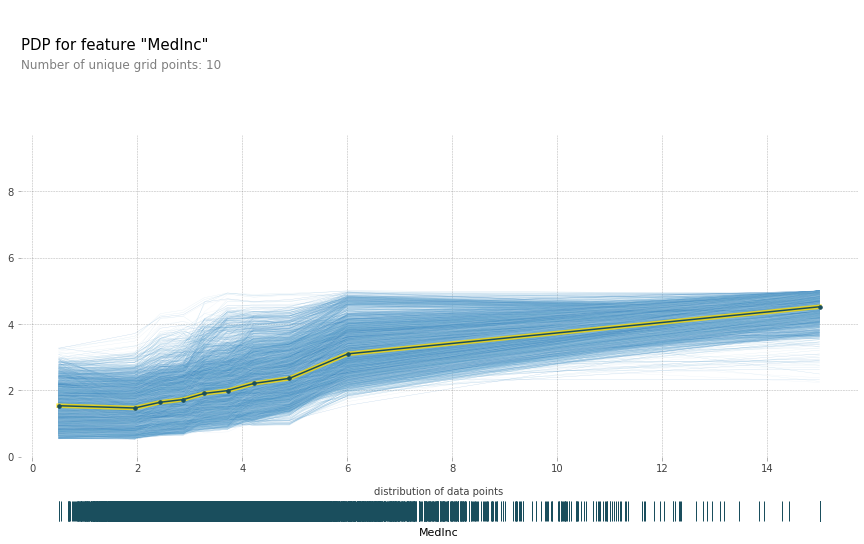

In [134]:
 # 將 ndarray 轉換成 DataFrame 格式
data = pd.DataFrame(X_test, columns=feature_names)
pdpbox_pdp(model, data, 'MedInc')

array([25., 30., 52., ..., 37.,  6., 36.])